In [1]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib

# Simple Linear Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10, 6)
import warnings
warnings.filterwarnings('ignore')

# Read Dataset

In [3]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [7]:
df.sample(5)

,TV,radio,newspaper,sales
153,171.3,39.7,37.7,19.0
80,76.4,26.7,22.3,11.8
127,80.2,0.0,9.2,8.8
144,96.2,14.8,38.9,11.4
108,13.1,0.4,25.6,5.3


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [9]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


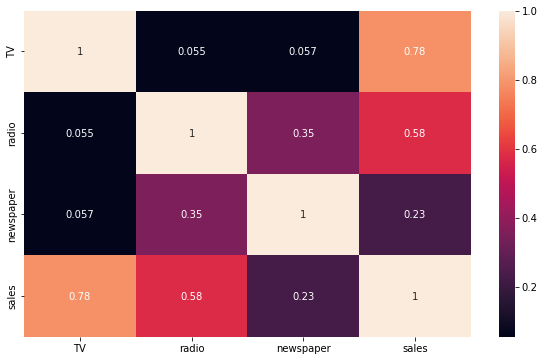

In [10]:
sns.heatmap(df.corr(), annot=True);

## Create new independent variable yeni bir feature olusturma feature enginniring

In [11]:
df["total_spend"] = df.TV +df.radio + df.newspaper
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


In [12]:
df = df.iloc[:, [0,1,2,4,3]]
df.head()

,TV,radio,newspaper,total_spend,sales
0,230.1,37.8,69.2,337.1,22.1
1,44.5,39.3,45.1,128.9,10.4
2,17.2,45.9,69.3,132.4,9.3
3,151.5,41.3,58.5,251.3,18.5
4,180.8,10.8,58.4,250.0,12.9


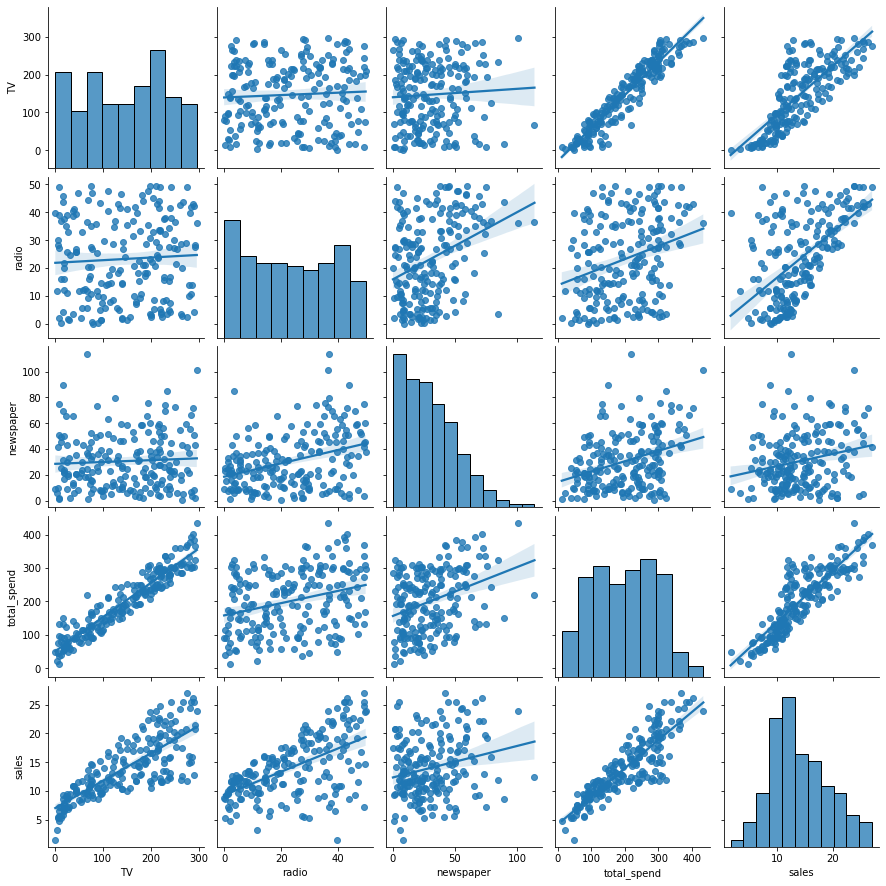

In [13]:
sns.pairplot(df, kind = "reg");

In [14]:
for i in df.drop(columns = "sales"):
    print(f"corr between sales and {i:<12}: {df.sales.corr(df[i])}")

corr between sales and TV          : 0.7822244248616064
corr between sales and radio       : 0.5762225745710553
corr between sales and newspaper   : 0.22829902637616528
corr between sales and total_spend : 0.8677123027017422


In [15]:
for i in df.drop(columns = "sales"):
    print(f"corr between sales and {i:<12}: {df.sales.corr(df[i]).round(4)}")

corr between sales and TV          : 0.7822
corr between sales and radio       : 0.5762
corr between sales and newspaper   : 0.2283
corr between sales and total_spend : 0.8677


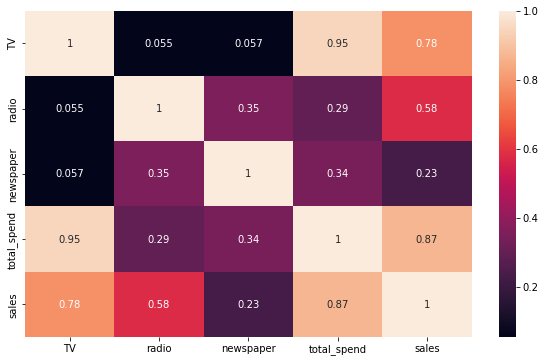

In [16]:
sns.heatmap(df.corr(), annot = True);

In [17]:
df = df[["total_spend", "sales"]]
df.head()

,total_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9


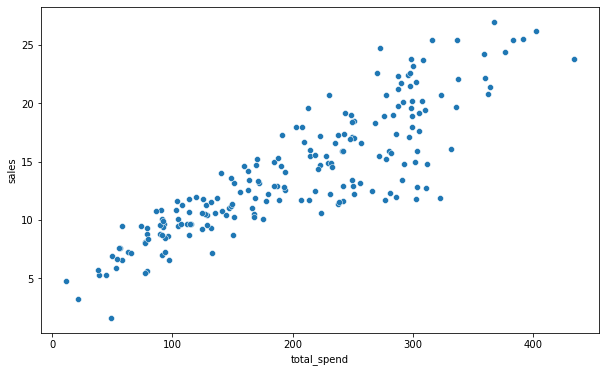

In [18]:
sns.scatterplot(x = "total_spend", y = "sales", data = df);

## Correlation between independent variable and dependent variable

In [19]:
corr = df.sales.corr(df.total_spend)
corr

0.8677123027017422

## Coefficant of determination (R2)

In [21]:
R2_score = corr**2
R2_score

0.7529246402599598

## R2 score = 3000 / (60.000 - 50.000)
## R2 score = 0.3

## Linear Regression

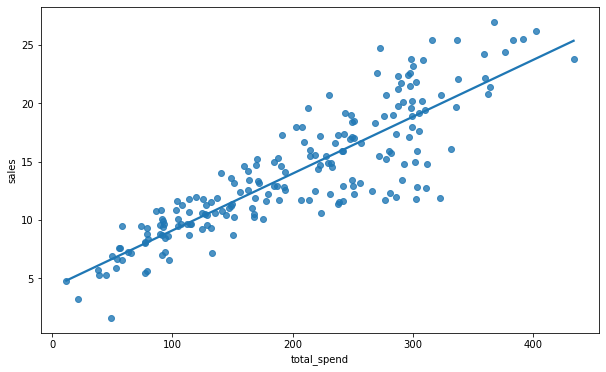

In [22]:
sns.regplot(x = "total_spend", y = "sales", data = df, ci = None);

## Spliting the dataset into X (independent variables) and y (dependent variables)

## y = b1 * X + b0
## y = bağımlı değişken = target variable = dependent variable
## b1 = katsayı/eğim, slope 0 < b1 < 1 and -1 < b1 < 0
## X = bağımsız değişken /feature, independent variable
## b0 = otonom parametre / intercept /başlangıç parametresi -∞ < 0 < +∞

In [23]:
X = df["total_spend"]
y = df["sales"]

In [24]:
np.polyfit(X, y, deg = 1)

array([0.04868788, 4.24302822])

## Determination of coefficients(slope and intercept)

In [28]:
slope, intercept = np.polyfit(X, y, deg = 1)
print("slope     :", slope)
print("intercept :", intercept)

slope     : 0.04868787931904818
intercept : 4.243028216036325
